Author: Pudhuyugan

Roll no: 18IM30017

GA Algorithm to optimize bank lending decisions

In [1]:
import numpy as np

In [2]:
# defining the fitness function 

def fitnessvalue(rl,l,lamda,K,D,ch):
    a=np.sum(ch*rl*lamda,axis=1)-np.sum(ch*lamda,axis=1)
    b=np.sum(((1-K)*D-l)*ch*0.01,axis=1)
    c=0.009*D
    d=np.sum(ch*lamda,axis=1)
    fit=a+b-c-d
    return fit
    
    
    
    

In [3]:
# initializing the variables 
D=60
K=0.15
l=np.array([10,25,4,11,18,3,17,15,9,10])
rl=np.array([0.021,0.022,0.021,0.027,0.025,0.026,0.023,0.021,0.028,0.022])
lamda=np.array([0.0002,0.0058,0.0001,0.0003,0.0024,0.0002,0.0058,0.0002,0.001,0.001])
n=60
cr=0.8
mr=0.006
n_iter=200

In [4]:
# main function
ch=[]
f=[]
for i in range(n):
     ch.append(np.random.randint(2, size=10))
for i in range(n_iter): 
    fit=fitnessvalue(rl,l,lamda,K,D,ch)
    f.append(max(fit));
    avg=np.mean(fit)
    x=np.round(fit/avg)  # finding the number of each parent to choose for reproduction
    x=x.astype(int)
    if sum(x)>60:
        x[0]=x[0]-(sum(x)-60)
    else:
        x[0]=x[0]+(60-sum(x))
    p=[];
    for i in range(60):
        for j in range(x[i]):
             p.append(ch[i])
    child=[];
    for k in range(0,60,2):     # doing crossover
        a=np.random.randint(0,9)
        rn=np.random.rand()
        if rn<=cr:
                b=np.concatenate((p[k][0:a],p[k+1][a:10]),axis=None)
                c=np.concatenate((p[k+1][0:a],p[k][a:10]),axis=None)
        else:
                b=p[k];
                c=p[k+1];
        child.append(b);
        child.append(c);
    for i in range(60):     # doing mutation
        for j in range(10):
            a=np.random.rand();
            if a<=mr:
                if child[i][j]==1:
                        child[i][j]=0
                else:
                        child[i][j]=1
                
    ch=child; # the child becomes the parent for the next iteration
    
    
                
    

In [5]:
# the array below gives the maximum fitness value achieved after each iteration
print(f)

[2.5715306, 2.5715306, 2.5715306, 2.5715306, 2.8967906, 2.8967906, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.0578672, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 2.9811347999999995, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 2.9811347999999995, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.0578672, 3.0578672, 2.9778614, 3.0578672, 2.9778614, 3.0578672, 3.0578672, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.0578672, 3.0578672, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.0578672, 3.3063948, 3.0578672, 3.3063948, 3.3063948, 3.0578672, 3.3063948, 3.3063948, 3.0578672, 3.3063948, 3.3063948, 3.3063948, 3.3063948, 3.

In [6]:
n_iter=list(range(1,201))

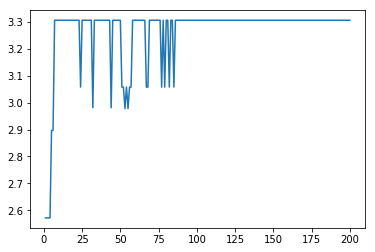

In [7]:
# plot of how fitness changes with each iteration

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.array(n_iter),np.array(f))

In [8]:
# the fitness array for final iteration
print(fit)

[0.5863517 0.5863517 1.3639839 0.5863517 1.8749692 2.1604253 2.2345734
 2.5473825 2.4889587 1.3308289 3.0578672 1.9342717 1.4451789 1.2242974
 2.2186578 2.9778614 2.5731128 2.1550848 2.1700371 1.4024109 1.6904331
 2.5113327 2.1737047 2.0046657 2.8967906 2.6215306 2.4769885 2.7293338
 1.9342717 2.1737047 2.2102352 2.4671854 2.9811348 2.0902342 2.2497286
 1.7304271 1.2808277 2.4973825 2.4671854 2.578262  2.1688491 2.2531933
 2.9778614 2.240241  2.9069867 2.290241  2.4887686 1.883393  3.3063948
 3.3063948 3.3063948 3.3063948 3.3063948 2.5715306 2.8967906 2.8365927
 2.8883668 2.1784609 2.1033107 2.1788539]


In [11]:
# the customer strings that gives the best fitness
print(ch[52],ch[51])

[1 1 1 1 0 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
